<a href="https://colab.research.google.com/github/Estiven-99/Predicci-n-de-Propiedades-Moleculares-/blob/main/Proyecto%20de%20Predicci%C3%B3n%20Open%20Colab%20%232.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Se importan los datos de Kaggle, los cuales se encuentran en el Repositorio con el nombre de Archivos Kaggle User Name, este codigo permite importar los archivos directamente desde kaggle sin tener que descargarlos solo es necesario el User Name de Kaggle, el cual se encuentra en el archivo nombrado. 

In [1]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"estivengutirrezprez","key":"8ce1a58a8f75779bc69489354476ddfa"}'}

In [2]:
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle competitions download -c champs-scalar-coupling

100% 375M/377M [00:03<00:00, 95.8MB/s]
100% 377M/377M [00:03<00:00, 101MB/s] 


In [4]:
!unzip champs-scalar-coupling

Streaming output truncated to the last 5000 lines.
  inflating: structures/dsgdb9nsd_128301.xyz  
  inflating: structures/dsgdb9nsd_128302.xyz  
  inflating: structures/dsgdb9nsd_128303.xyz  
  inflating: structures/dsgdb9nsd_128304.xyz  
  inflating: structures/dsgdb9nsd_128305.xyz  
  inflating: structures/dsgdb9nsd_128306.xyz  
  inflating: structures/dsgdb9nsd_128308.xyz  
  inflating: structures/dsgdb9nsd_128309.xyz  
  inflating: structures/dsgdb9nsd_128310.xyz  
  inflating: structures/dsgdb9nsd_128311.xyz  
  inflating: structures/dsgdb9nsd_128312.xyz  
  inflating: structures/dsgdb9nsd_128313.xyz  
  inflating: structures/dsgdb9nsd_128314.xyz  
  inflating: structures/dsgdb9nsd_128315.xyz  
  inflating: structures/dsgdb9nsd_128316.xyz  
  inflating: structures/dsgdb9nsd_128317.xyz  
  inflating: structures/dsgdb9nsd_128318.xyz  
  inflating: structures/dsgdb9nsd_128319.xyz  
  inflating: structures/dsgdb9nsd_128320.xyz  
  inflating: structures/dsgdb9nsd_128321.xyz  
  inflati

**Importamos las librerias necesarias.**

In [6]:
#Primero importamos las librerias
####################################################
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.model_selection import cross_val_score
import random
random.seed(42)
import os
#print(os.listdir("../input"))



**Se seleccionan los datos necesarios.**

In [7]:
#Necesitamos los siguientes datos
####################################################

pot_energy=pd.read_csv('potential_energy.csv')
mulliken_charges=pd.read_csv('mulliken_charges.csv')
train_df=pd.read_csv('train.csv')
scalar_coupling_cont=pd.read_csv('scalar_coupling_contributions.csv')
test_df=pd.read_csv('test.csv')
magnetic_shield_tensor=pd.read_csv('magnetic_shielding_tensors.csv')
dipole_moment=pd.read_csv('dipole_moments.csv')
structures=pd.read_csv('structures.csv')

In [8]:
print('Shape of potential energy dataset:',pot_energy.shape)
print('Shape of mulliken_charges dataset:',mulliken_charges.shape)
print('Shape of train dataset:',train_df.shape)
print('Shape of scalar coupling contributions dataset:',scalar_coupling_cont.shape)
print('Shape of test dataset:',test_df.shape)
print('Shape of magnetic shielding tensors dataset:',magnetic_shield_tensor.shape)
print('Shape of dipole moments dataset:',dipole_moment.shape)
print('Shape of structures dataset:',structures.shape)

Shape of potential energy dataset: (130789, 2)
Shape of mulliken_charges dataset: (2358875, 3)
Shape of train dataset: (4659076, 6)
Shape of scalar coupling contributions dataset: (4659076, 8)
Shape of test dataset: (2505190, 5)
Shape of magnetic shielding tensors dataset: (2358875, 11)
Shape of dipole moments dataset: (130789, 4)
Shape of structures dataset: (2358875, 6)


**Se exploran los datasets.**

In [9]:
#Exploramos los datasetes
####################################################


#Dataset de energia
print('Data Types:\n',pot_energy.dtypes)
print('Descriptive statistics:\n',np.round(pot_energy.describe(),3))
pot_energy.head(6)



#Datasetes de la carga
print('Data Types:\n',mulliken_charges.dtypes)
print('Descriptive statistics:\n',np.round(mulliken_charges.describe(),3))
mulliken_charges.head(6)


#Datasetes 
print('Data Types:\n',train_df.dtypes)
print('Descriptive statistics:\n',np.round(train_df.describe(),3))
train_df.head(6)



#Datasetes del acople escalar
print('Data Types:\n',scalar_coupling_cont.dtypes)
print('Descriptive statistics:\n',np.round(scalar_coupling_cont.describe(),3))
scalar_coupling_cont.head(6)

#Dataset estadistico
print('Data Types:\n',test_df.dtypes)
print('Descriptive statistics:\n',np.round(test_df.describe(),3))
test_df.head(6)

#Dataset de tensor de campo magnetico
print('Data Types:\n',magnetic_shield_tensor.dtypes)
print('Descriptive statistics:\n',np.round(magnetic_shield_tensor.describe(),3))
magnetic_shield_tensor.head(6)


#Dataset de la estructura
print('Data Types:\n',structures.dtypes)
print('Descriptive statistics:\n',np.round(structures.describe(),3))
structures.head(6)


Data Types:
 molecule_name        object
potential_energy    float64
dtype: object
Descriptive statistics:
        potential_energy
count        130789.000
mean           -410.951
std              39.840
min            -714.626
25%            -438.003
50%            -416.921
75%            -387.222
max             -40.524
Data Types:
 molecule_name       object
atom_index           int64
mulliken_charge    float64
dtype: object
Descriptive statistics:
         atom_index  mulliken_charge
count  2358875.000      2358875.000
mean         8.757           -0.000
std          5.592            0.226
min          0.000           -0.733
25%          4.000           -0.192
50%          9.000            0.099
75%         13.000            0.127
max         28.000            0.729
Data Types:
 id                            int64
molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
scalar_coupling_constant  

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397
5,dsgdb9nsd_000002,0,N,-0.040426,1.024108,0.062564


In [10]:

#######################################################################################
#Mapa de la estructura atomica y prueba

def map_atom_data(df,atom_idx):
    df=pd.merge(df,structures,how='left',
               left_on=['molecule_name',f'atom_index_{atom_idx}'],
               right_on=['molecule_name','atom_index'])
    df=df.drop('atom_index',axis=1)
    df=df.rename(columns={'atom':f'atom_{atom_idx}',
                         'x':f'x_{atom_idx}',
                         'y':f'y_{atom_idx}',
                         'z':f'z_{atom_idx}'})
    return df
train_df=map_atom_data(train_df,0)
train_df=map_atom_data(train_df,1)

test_df=map_atom_data(test_df,0)
test_df=map_atom_data(test_df,1)




In [11]:
train_m_0=train_df[['x_0','y_0','z_0']].values
train_m_1=train_df[['x_1','y_1','z_1']].values

test_m_0=test_df[['x_0','y_0','z_0']].values
test_m_1=test_df[['x_1','y_1','z_1']].values

train_df['dist_vector']=np.linalg.norm(train_m_0-train_m_1,axis=1)
train_df['dist_X']=(train_df['x_0']-train_df['x_1'])**2
train_df['dist_Y']=(train_df['y_0']-train_df['y_1'])**2
train_df['dist_Z']=(train_df['z_0']-train_df['z_1'])**2

test_df['dist_vector']=np.linalg.norm(test_m_0-test_m_1,axis=1)
test_df['dist_X']=(test_df['x_0']-test_df['x_1'])**2
test_df['dist_Y']=(test_df['y_0']-test_df['y_1'])**2
test_df['dist_Z']=(test_df['z_0']-test_df['z_1'])**2


In [12]:
train_df['type_0']=train_df['type'].apply(lambda x:x)
test_df['type_0']=test_df['type'].apply(lambda x : x)

train_df=train_df.drop(columns=['molecule_name','type'],axis=1)
display(train_df.head(6))


test_df=test_df.drop(columns=['molecule_name','type'],axis=1)
display(test_df.head(10))

,id,atom_index_0,atom_index_1,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0
0,0,1,0,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036,1JHC
1,1,1,2,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003,2JHH
2,2,1,3,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973,2JHH
3,3,1,4,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,0.276638,2.085032,0.817978,2JHH
4,4,2,0,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.049455,0.142844,0.000060,1JHC
5,5,2,3,-11.2541,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,1.783158,2.410399,0.000263,0.768989,2JHH


,id,atom_index_0,atom_index_1,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0
0,4659076,2,0,H,-1.661639,0.00000,1.000000,C,0.599539,0.000000,1.000000,2.261178,5.112926,0.000000,0.000000,2JHC
1,4659077,2,1,H,-1.661639,0.00000,1.000000,C,-0.599539,0.000000,1.000000,1.062099,1.128054,0.000000,0.000000,1JHC
2,4659078,2,3,H,-1.661639,0.00000,1.000000,H,1.661639,0.000000,1.000000,3.323277,11.044171,0.000000,0.000000,3JHH
3,4659079,3,0,H,1.661639,0.00000,1.000000,C,0.599539,0.000000,1.000000,1.062099,1.128054,0.000000,0.000000,1JHC
4,4659080,3,1,H,1.661639,0.00000,1.000000,C,-0.599539,0.000000,1.000000,2.261178,5.112926,0.000000,0.000000,2JHC
5,4659081,3,0,H,1.011533,1.89662,-0.019202,C,-0.008605,1.502038,-0.006812,1.093860,1.040682,0.155695,0.000153,1JHC
6,4659082,3,1,H,1.011533,1.89662,-0.019202,C,0.010993,-0.017649,-0.013770,2.159985,1.001081,3.664426,0.000029,2JHC
7,4659083,3,4,H,1.011533,1.89662,-0.019202,H,-0.531599,1.880761,-0.889747,1.771823,2.381256,0.000252,0.757849,2JHH
8,4659084,3,5,H,1.011533,1.89662,-0.019202,H,-0.516746,1.876118,0.887107,1.776922,2.335637,0.000420,0.821396,2JHH
9,4659085,3,6,H,1.011533,1.89662,-0.019202,H,0.523771,-0.389123,0.888241,2.507187,0.237912,5.224622,0.823452,3JHH


**Histograma.**

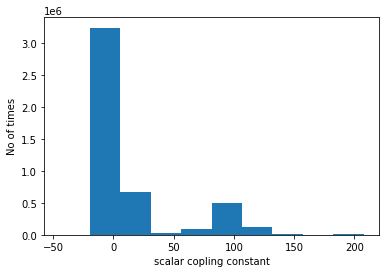

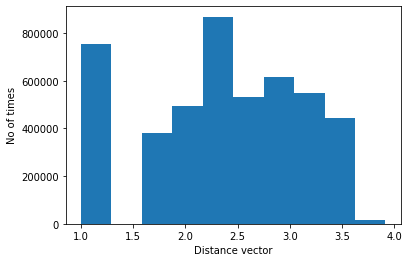

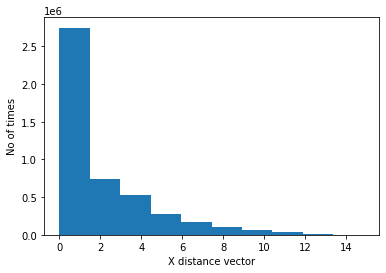

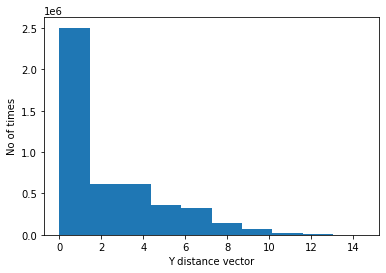

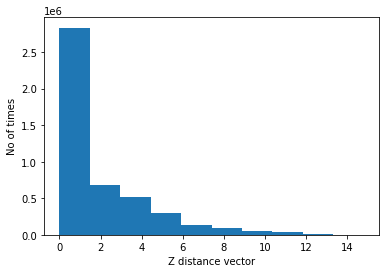

,id,atom_index_0,atom_index_1,scalar_coupling_constant,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist_vector,dist_X,dist_Y,dist_Z,type_0
0,0,1,0,84.8076,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.000220,1.192105,0.000036,1JHC
1,1,1,2,-11.2570,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,1.783120,1.019253,2.160261,0.000003,2JHH
2,2,1,3,-11.2548,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,1.783147,0.294812,2.112831,0.771973,2JHH
3,3,1,4,-11.2543,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,1.783157,0.276638,2.085032,0.817978,2JHH
4,4,2,0,84.8074,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,1.091952,1.049455,0.142844,0.000060,1JHC


In [13]:
##############################################
#Histograma de visualizacion

train_df['type_0']=train_df.type_0.astype('category')
train_df['atom_0']=train_df.atom_0.astype('category')
train_df['atom_1']=train_df.atom_1.astype('category')


test_df['type_0']=test_df.type_0.astype('category')
test_df['atom_0']=test_df.atom_0.astype('category')
test_df['atom_1']=test_df.atom_1.astype('category')

plt.hist(train_df['scalar_coupling_constant'])
plt.ylabel('No of times')
plt.xlabel('scalar copling constant')
plt.show()

plt.hist(train_df['dist_vector'])
plt.ylabel('No of times')
plt.xlabel('Distance vector')
plt.show()

plt.hist(train_df['dist_X'])
plt.ylabel('No of times')
plt.xlabel('X distance vector')
plt.show()


plt.hist(train_df['dist_Y'])
plt.ylabel('No of times')
plt.xlabel('Y distance vector')
plt.show()


plt.hist(train_df['dist_Z'])
plt.ylabel('No of times')
plt.xlabel('Z distance vector')
plt.show()

train_df.head(5)



**Comenzamos con el Modelo de predicción**

In [14]:
Attributes=['atom_index_0','atom_index_1','type_0','x_0','y_0','z_0','atom_0',
            'atom_1','x_1','y_1','z_1','dist_vector','dist_X','dist_Y','dist_Z']

cat_attributes=['type_0','atom_0','atom_1']
target_label=['scalar_coupling_constant']


X_train=train_df[Attributes]
X_test=test_df[Attributes]
y_target=train_df[target_label]



In [15]:

X_train=pd.get_dummies(data=X_train,columns=cat_attributes)
X_test=pd.get_dummies(data=X_test,columns=cat_attributes)

In [16]:
print(X_train.shape,X_test.shape)

(4659076, 24) (2505190, 24)


In [17]:
X_train.head(6)
y_target.head(6)

,scalar_coupling_constant
0,84.8076
1,-11.2570
2,-11.2548
3,-11.2543
4,84.8074
5,-11.2541


In [18]:
threshold=0.95

corr_matrix=train_df.corr().abs()

upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

In [19]:
to_drop=[column for column in upper.columns if any(upper[column]>threshold)]
print('There are are %d columns to remove.'%(len(to_drop)))


There are are 0 columns to remove.


In [20]:
train_df=train_df.drop(columns=to_drop)
test_df=test_df.drop(columns=to_drop)
print('Training data shape',train_df.shape)
print('Testing data shape',test_df.shape)


Training data shape (4659076, 17)
Testing data shape (2505190, 16)


In [21]:
Attributes=['atom_index_0','atom_index_1','type_0','x_0','y_0','z_0','atom_0',
            'atom_1','x_1','y_1','z_1','dist_vector','dist_X','dist_Y','dist_Z']

cat_attributes=['type_0','atom_0','atom_1']
target_label=['scalar_coupling_constant']


X_train=train_df[Attributes]
X_test=test_df[Attributes]
y_target=train_df[target_label]

In [22]:
#Transform categorical variables
X_train=pd.get_dummies(data=X_train,columns=cat_attributes)
X_test=pd.get_dummies(data=X_test,columns=cat_attributes)

In [23]:
print(X_train.shape,X_test.shape)

(4659076, 24) (2505190, 24)


In [24]:
display(y_target.shape)

(4659076, 1)

In [25]:
X_train.head(6)
X_test.head(6)
y_target.head(6)

,scalar_coupling_constant
0,84.8076
1,-11.2570
2,-11.2548
3,-11.2543
4,84.8074
5,-11.2541


In [26]:
from sklearn import linear_model
linear_reg=linear_model.LinearRegression()
n_folds=5

lin_reg_score=cross_val_score(linear_reg,X_train,y_target,
                              scoring=make_scorer(mean_squared_error),
                              cv=n_folds)
lin_score=sum(lin_reg_score)/n_folds
print('Lin_score:' ,lin_score)    

Lin_score: 62.44042806883654


In [27]:
lr_model=linear_reg.fit(X_train,y_target)
score=np.round(lr_model.score(X_train,y_target),3)
print('Accuracy of trained model:', score)
model_coeff=np.round(lr_model.coef_,3)
print('Model coefficients:', model_coeff)
model_intercept=np.round(lr_model.intercept_,3)
print('Model intercept value:' ,model_intercept)

Accuracy of trained model: 0.949
Model coefficients: [[-1.5700e-01  4.6300e-01  4.8000e-02 -2.6900e-01  3.9000e-02  5.0000e-03
   1.2800e-01 -1.1200e-01 -1.4881e+01  3.0320e+00  3.0710e+00  3.0200e+00
   6.3522e+01  2.7130e+01 -2.6427e+01 -1.4865e+01 -1.1310e+01 -2.3906e+01
   6.2300e-01 -1.4767e+01  0.0000e+00  1.3189e+01 -1.4242e+01  1.0530e+00]]
Model intercept value: [31.421]


In [28]:
from pickle import FALSE
from sklearn.metrics import r2_score
y_pred=lr_model.predict(X_test)
SCC=pd.read_csv('sample_submission.csv')#('../input/sample_submission.csv')
SCC['scalar_coupling_constant']=y_pred
SCC.to_csv('Linear_Regression_model.csv' ,index=False)


In [ ]:
from sklearn import linear_model
lasso=linear_model.Lasso(alpha=0.001)
n_folds=5

lasso_score=cross_val_score(lasso,X_train,y_target,
                            scoring=make_scorer(mean_squared_error),
                            cv=n_folds)
lasso_score=sum(lasso_score)/n_folds
print('lasso_score:' ,lasso_score)
print(lasso)

In [ ]:
lasso_model=lasso.fit(X_train,y_target)
score=np.round(lasso_model.score(X_train,y_target),3)
print('Accuracy of trained model:',score)

Accuracy of trained model: 0.949


In [ ]:
y_pred=lasso_model.predict(X_test)
SCC=pd.read_csv('sample_submission.csv')#('../input/sample_submission.csv')
SCC['scalar_coupling_constant']= y_pred
SCC.to_csv('Lasso_Regression_model.csv',index=False)
y_pred

array([-0.34454628, 95.66074329,  2.80455696, ...,  5.63692531,
        1.54576472, 97.22348934])

In [ ]:
from sklearn import linear_model
Elast=linear_model.ElasticNet(alpha=0.008,l1_ratio=0.5,random_state=42)
n_folds=5

Elast_score=cross_val_score(Elast,X_train,y_target,
                          scoring=make_scorer(mean_squared_error),
                          cv=n_folds)
Elast_score=sum(Elast_score)/n_folds
print('Elast_score:',Elast_score)
print(Elast)


Elast_score: 64.67896648813242
ElasticNet(alpha=0.008, random_state=42)


In [ ]:
ElasticNet_model=linear_reg.fit(X_train,y_target)
score=np.round(ElasticNet_model.score(X_train,y_target),3)
print('Accuracy of trained model:',score)


Accuracy of trained model: 0.949


In [ ]:
y_pred=ElasticNet_model.predict(X_test)
SCC=pd.read_csv('sample_submission.csv')#('../input/sample_submission.csv')
SCC['scalar_coupling_constant']= y_pred
SCC.to_csv('ElasticNet_Regression_model.csv',index=False)
y_pred

array([[-0.4260192 ],
       [95.74081135],
       [ 2.76759043],
       ...,
       [ 5.67288913],
       [ 1.44052122],
       [97.27668311]])